<a href="https://colab.research.google.com/github/suyashmarathe512/suyash/blob/main/CNN_using_only_maths_and_numpy(no_pytorch_TFs_Keras).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('mnist_train.csv')
data.dtypes

label    int64
1x1      int64
1x2      int64
1x3      int64
1x4      int64
         ...  
28x24    int64
28x25    int64
28x26    int64
28x27    int64
28x28    int64
Length: 785, dtype: object

In [24]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape


In [25]:
Y_train

array([7, 2, 5, ..., 4, 0, 0])

Our NN will have a simple two-layer architecture. Input layer  a[0]
  will have 784 units corresponding to the 784 pixels in each 28x28 input image. A hidden layer  a[1]
  will have 10 units with ReLU activation, and finally our output layer  a[2]
  will have 10 units corresponding to the ten digit classes with softmax activation.

*Forward propagation*

Z[1]=W[1]X+b[1]

A[1]=gReLU(Z[1]))

Z[2]=W[2]A[1]+b[2]

A[2]=gsoftmax(Z[2])

*Backward propagation*

dZ[2]=A[2]−Y

dW[2]=1mdZ[2]A[1]T

dB[2]=1mΣdZ[2]

dZ[1]=W[2]TdZ[2].∗g[1]′(z[1])

dW[1]=1mdZ[1]A[0]T

dB[1]=1mΣdZ[1]

*Parameter updates*

W[2]:=W[2]−αdW[2]

b[2]:=b[2]−αdb[2]

W[1]:=W[1]−αdW[1]

b[1]:=b[1]−αdb[1]

*Vars and shapes*

*Forward prop*

A[0]=X
 : 784 x m

Z[1]∼A[1]
 : 10 x m

W[1]
 : 10 x 784 (as  W[1]A[0]∼Z[1]
 )

B[1]
 : 10 x 1

Z[2]∼A[2]
 : 10 x m

W[1]
 : 10 x 10 (as  W[2]A[1]∼Z[2]
 )

B[2]
 : 10 x 1

*Backprop*

dZ[2]
 : 10 x m (  A[2]
 )

dW[2]
 : 10 x 10

dB[2]
 : 10 x 1

dZ[1]
 : 10 x m (  A[1]
 )

dW[1]
 : 10 x 10

dB[1]
 : 10 x 1


In [26]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [27]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [28]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[7 1 7 ... 7 7 7] [7 2 5 ... 4 0 0]
0.09461016949152543
Iteration:  10
[5 0 3 ... 5 0 0] [7 2 5 ... 4 0 0]
0.24596610169491526
Iteration:  20
[5 0 3 ... 0 0 0] [7 2 5 ... 4 0 0]
0.30089830508474574
Iteration:  30
[5 0 3 ... 0 0 0] [7 2 5 ... 4 0 0]
0.34372881355932206
Iteration:  40
[5 0 3 ... 0 0 0] [7 2 5 ... 4 0 0]
0.38069491525423726
Iteration:  50
[5 2 3 ... 0 0 0] [7 2 5 ... 4 0 0]
0.41927118644067796
Iteration:  60
[7 2 3 ... 0 0 0] [7 2 5 ... 4 0 0]
0.4599830508474576
Iteration:  70
[7 2 3 ... 0 0 0] [7 2 5 ... 4 0 0]
0.49677966101694915
Iteration:  80
[7 2 3 ... 4 0 0] [7 2 5 ... 4 0 0]
0.5277118644067796
Iteration:  90
[7 2 5 ... 4 0 0] [7 2 5 ... 4 0 0]
0.5552542372881356
Iteration:  100
[7 2 5 ... 4 0 0] [7 2 5 ... 4 0 0]
0.5861186440677966
Iteration:  110
[7 2 5 ... 4 0 0] [7 2 5 ... 4 0 0]
0.6141864406779661
Iteration:  120
[7 6 5 ... 4 0 0] [7 2 5 ... 4 0 0]
0.639
Iteration:  130
[7 6 5 ... 4 0 0] [7 2 5 ... 4 0 0]
0.6593050847457627
Iteration:  140
[7 6 5 

~85% accuracy on training data

In [29]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Examples.


Prediction:  [7]
Label:  7


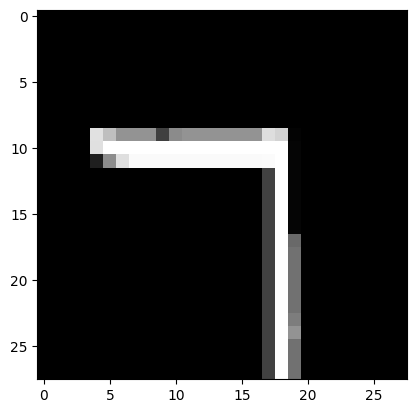

Prediction:  [2]
Label:  2


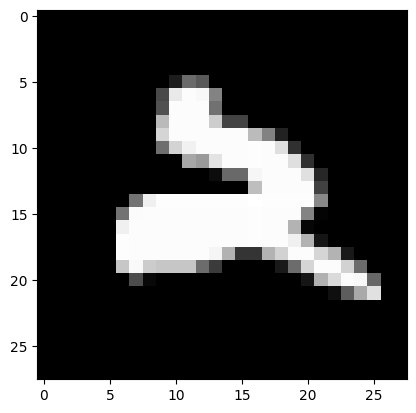

Prediction:  [5]
Label:  5


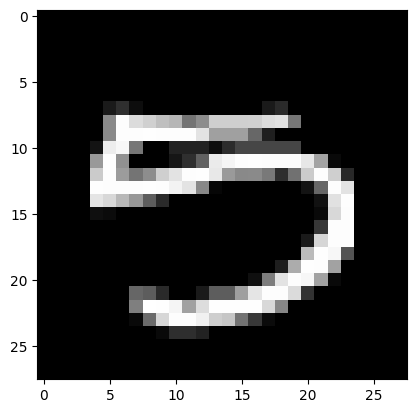

Prediction:  [4]
Label:  4


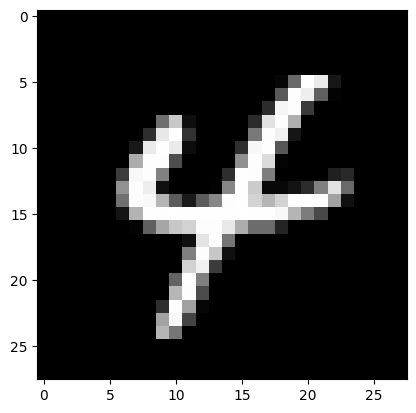

In [30]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [31]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[7 6 9 2 5 9 1 1 6 1 8 4 8 4 2 3 0 2 1 7 8 5 9 6 8 5 2 0 7 6 7 1 2 7 9 0 4
 7 9 4 7 1 9 1 2 7 8 8 6 4 0 8 8 6 9 7 3 6 7 0 0 9 4 3 1 2 1 4 6 2 2 5 5 7
 7 8 9 9 3 1 9 1 0 6 0 1 9 1 7 8 0 1 4 5 4 3 9 5 7 6 6 5 5 8 0 7 2 6 4 9 5
 4 4 7 7 6 2 5 7 2 4 0 6 4 2 3 7 5 7 9 1 3 7 8 7 3 5 9 7 1 0 0 3 5 1 9 4 4
 8 6 8 9 9 1 2 0 6 8 9 4 3 2 1 8 8 2 0 7 9 9 2 4 9 9 1 1 6 4 2 1 9 8 9 4 4
 6 2 9 4 1 2 0 0 7 2 9 1 5 2 9 6 0 8 8 5 4 2 9 1 9 3 7 0 7 6 3 8 4 6 0 7 4
 9 4 3 3 0 1 3 8 3 2 1 2 2 3 6 2 6 8 3 1 6 2 5 8 6 5 3 6 7 9 3 4 0 9 4 2 9
 5 0 3 4 2 6 2 3 0 7 0 2 8 8 6 4 8 0 6 2 4 7 2 9 9 9 1 2 2 0 3 1 9 6 9 6 3
 2 2 1 6 0 2 3 9 7 5 6 5 6 9 9 8 1 0 7 5 0 8 6 3 4 3 6 2 5 4 7 3 8 4 6 7 4
 3 8 1 0 6 0 5 5 2 3 5 7 4 0 7 6 0 4 7 3 2 5 8 7 0 3 6 0 0 0 4 3 7 7 3 4 6
 5 7 0 8 6 8 8 5 9 7 6 5 7 1 5 4 3 5 7 4 8 4 3 8 5 5 5 2 5 0 2 7 5 9 8 4 3
 5 0 1 8 1 3 7 3 2 3 1 8 3 1 4 0 4 5 3 1 0 1 8 2 3 1 1 1 9 7 4 1 4 8 9 7 9
 8 0 4 8 1 1 3 9 7 5 2 9 1 6 3 0 5 1 7 3 0 9 7 0 6 1 8 0 0 0 9 8 3 4 8 4 0
 2 5 4 9 4 5 0 5 5 1 0 6 

0.84